
## The Perfect Race: Effects of age and wind on men' s fastest 100m races

Contributors: Anesu Masube and Aaron Childress

Table of Contents

1. Problem Statement
2. Data Sources
3. Data Collection
4. Hypothesis Test I
5. Hypothesis Test II
6. Findings and Analysis
7. Recommendations

In [14]:
#Import libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
 

## Problem Statement

Professional 100 meter sprinters train their whole lives for a 10 second performance. In this race, success or failure is often measured in hundredths of a second. One of the most desirable achievements for a track athlete is winning gold at the Olympics. Unfortunately, they only get one shot every four years to run the perfect race. With the 2020 Olympics around the corner, it’s a relevant business case to take a look at factors potentially influencing the fastest 100 meter sprint times run since 1964.
From a business standpoint, our objective is to provide data supported, actionable recommendations to the International Olympic Committee (IOC).

 
We seek to explore how much of a factor father time (age) and mother nature (wind) are when it comes to running the perfect race. We conducted 3 Hypothesis tests as outlined below:

1. ANOVA. Are wind and age together significant in explaining variation in sprint times? 
2. Welch's t-test on wind. We seek to answer whether wind has a statistically significant effect on race times 
3. Welch's t-test on age. We seek to answer whether age has a statistically significant effect on race times


## Data Sources

We scraped data from alltime-athletics.com. The data set is called "All-time men's best 100m". This data set contains over 3000 records of the fastest men's 100 meter times ever recorded. Worthy of note, these are not necessarily winning times. 

## Data Cleaning

In [15]:
%run ../ 

ERROR:root:File `'../.py'` not found.


In [16]:
%run  ../

ERROR:root:File `'../.py'` not found.


After scraping the data from alltime-athletics.com, we loaded the data to a dataframe, accessing the specific columns that we needed for the analysis. These included, 1. The fastest run times 2. Dates which these times were achieved 3. Date of birth of the respective runners 4. Country of origin 5. Tail wind on the day of the race. We transformed and cleaned the data and created an additional age column 


In [17]:
# Clean Men's 100m data set 

# Hypothesis Testing

### Initial 2 way Anova Test for both wind and age

we conducted an exploratory test on our data using a 2 way ANOVA to test the influence of wind and age on winning times. From this initial analysis the p-value of both wind and age was less than alpha which we set to 0.05 and hence we were able to reject the null hypothesis. We then conducted further anlysis of each variable as detailed below

In [18]:
#ANOVA Test to test the influence of wind and age on winning times 

#stats.f_oneway(df.winning_times, df.tail_wind, df.age)
formula = 'winning_times ~ tail_wind + age'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

              sum_sq      df          F    PR(>F)
tail_wind   0.018898     1.0   3.776043  0.052091
age         0.052691     1.0  10.528346  0.001189
Residual   14.048235  2807.0        NaN       NaN


### Hypothesis 1- Wind

$H_{0}$: There is no difference in mean runtimes with tailwind versus runtimes with headwinds. i.e. $\mu_{0} = \mu_{1}$

$H_{1}$: Mean runtimes with tailwind are lower than mean runtimes with headwind 

After setting up a signifince level of 0.05 we tested the above assumptions by creating 2 groups of the 3000 fastest ever legally recorded times 1 group with a positive tailwind (>=0 m/s) and another with a head wind of (< 0 m/s). We conducted a Welch Ts test and found the p value to be less than the alpha hecne we reject the null hypothesis. Additionally we plotted the fastest times of each tailwind and came up with a linear regression which shows how speed increases and tailwind increases 

In [19]:
# Accessing cleaned Men's 100m dataframe

df=pd.read_csv('df.csv', index_col='date')
df.index = pd.to_datetime(df.index)
df['birth_date'] = pd.to_datetime(df['birth_date'])
by_wind = df.sort_values(by='tail_wind')

In [20]:
length = len(by_wind.index)
if length%2 == 0:
    h1 = int(length/2)
else:
    h1 = int(round(length/2))

In [21]:
less_wind = by_wind["tail_wind"] < 0
more_wind = by_wind["tail_wind"] >= 0
tw_strong = by_wind[more_wind]
exp = np.array(tw_strong.winning_times)
tw_weak = by_wind[less_wind]

stats.ttest_ind(tw_weak.winning_times,tw_strong.winning_times, equal_var = False)

Ttest_indResult(statistic=2.114203109673011, pvalue=0.03470402297231195)

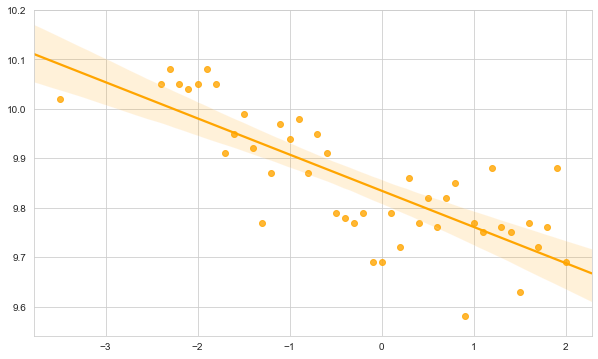

In [22]:
#Visualizations Related to Tailwind Testing 

min_bywind=by_wind.groupby('tail_wind')['winning_times'].min()

x = np.array(min_bywind.index)
y = np.array(min_bywind)

figure = plt.figure(figsize = (10, 6))
sns.regplot(x=x, y=y, color="orange")

### Create Wind vs Run Time plot with (adjustment for modeled headwind effect)

In [23]:
# Get regression line coefficients
coef = np.polyfit(x,y,1)
m, b =coef[0], coef[1]
print(m,b)

-0.07323085810445785 9.83423074508031


In [24]:
# Selecting headwind values <= 0
headwind = x <= 0
x_headwind = x[headwind]
# Selecting 
y_headwind = y[:len(x_headwind)]
y_headwind

array([10.02, 10.05, 10.08, 10.05, 10.04, 10.05, 10.08, 10.05,  9.91,
        9.95,  9.99,  9.92,  9.77,  9.87,  9.97,  9.94,  9.98,  9.87,
        9.95,  9.91,  9.79,  9.78,  9.77,  9.79,  9.69,  9.69])

In [25]:
# Adjusting y values to remove effect of headwind
y_adjusted= y_headwind - m*x_headwind
y_adjusted

array([9.763692  , 9.87424594, 9.91156903, 9.88889211, 9.8862152 ,
       9.90353828, 9.94086137, 9.91818446, 9.78550754, 9.83283063,
       9.88015371, 9.8174768 , 9.67479988, 9.78212297, 9.88944606,
       9.86676914, 9.91409223, 9.81141531, 9.8987384 , 9.86606149,
       9.75338457, 9.75070766, 9.74803074, 9.77535383, 9.68267691,
       9.69      ])

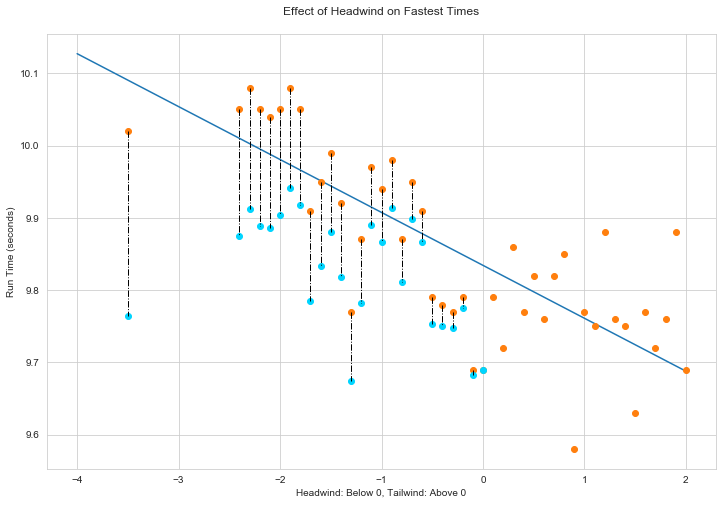

In [26]:
#light blue are headwind-adjusted times (ie.projected times if there were no headwind)

#chart settings
sns.set_style('whitegrid')

figure = plt.figure(figsize = (12, 8))
xnew = np.linspace(-4,2,100)
ynew = np.poly1d(coef)
_=plt.plot(xnew,ynew(xnew),x,y,'o')
_=plt.plot(x_headwind,y_adjusted,'o', color='#00D5FF')
_=plt.xlabel('Headwind: Below 0, Tailwind: Above 0')
_=plt.ylabel('Run Time (seconds)')
_=plt.title("Effect of Headwind on Fastest Times", y=1.03)

for i,x in enumerate(x_headwind):
    ymin=y_adjusted[i]
    ymax=y[i]
    _=plt.plot([x, x], [ymax, ymin], 'k-.', lw= 1.0)

### Hypothesis Test 2 - Age

$H_{0}$: There is no difference in the mean of runtimes of the test age group which is 27-29 versus the other age groups  i.e. $\mu_{0} = \mu_{1}$

$H_{1}$: The mean of the test age group is lower than the control age group

Through EDA we plotteded the fastest times for each age and generated a parabolic pattern which enabled us to create a treatment age group of 27-29 years old as this was +/- 1 year of 28 (the minimum on our curve). We then conducted a Welch T test with other treatment age groups and the p value was 0.22 which is above the alpha (p-value = 0.05%). Therefore, we failed to reject the null hypothesis that there is no difference in mean runtime between groups.

In [27]:
df['age_clean'] = df['age'].apply(lambda x: round(x,0))

In [28]:
df.head()

,winning_times,tail_wind,birth_date,country,age,age_clean
date,,,,,,
2013-04-28,10.01,0.9,1995-12-15,JPN,17.380822,17.0
2002-07-17,10.09,-0.6,1984-11-10,TTO,17.693151,18.0
2018-02-06,10.09,0.9,2000-05-09,USA,17.758904,18.0
2017-04-08,10.05,-0.6,1999-06-03,JPN,17.860274,18.0
2008-06-28,10.01,1.6,1990-08-01,USA,17.920548,18.0


In [29]:
# Selecting the fastest time for each age 
by_age = df.groupby('age_clean')['winning_times'].min()
by_age

age_clean
17.0    10.01
18.0    10.01
19.0     9.97
20.0     9.84
21.0     9.82
22.0     9.69
23.0     9.58
24.0     9.77
25.0     9.72
26.0     9.63
27.0     9.69
28.0     9.78
29.0     9.78
30.0     9.79
31.0     9.80
32.0     9.77
33.0     9.74
34.0     9.89
35.0     9.92
36.0     9.97
37.0     9.87
38.0     9.96
39.0     9.98
40.0     9.93
Name: winning_times, dtype: float64

In [30]:
# Visualisations of the age effect 
x = np.array(by_age.index)
y = np.array(by_age)


## Hypothesis formed by looking at curve of fastest run times at each age
### Quadriatic equation: degree 2
### y = ax**2 + bx + c

In [31]:
# Curve fitting
min_age, max_age = int(x.min()), int(x.max())
poly_coefficients = np.polyfit(x,y,2)
poly_coefficients

array([ 2.15118577e-03, -1.19256719e-01,  1.13780215e+01])

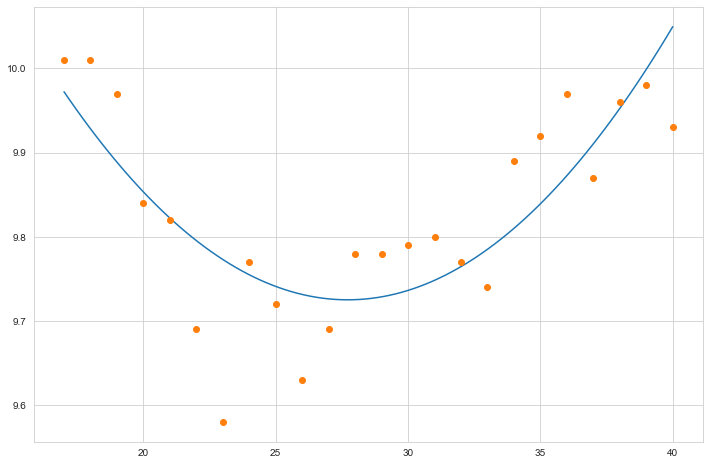

In [32]:
x_new = np.linspace(min_age,max_age,100)
y_new = np.poly1d(poly_coefficients)
_=plt.figure(figsize = (12, 8))
_=plt.plot(x_new,y_new(x_new),x,y,'o')

In [33]:
# finding the age on the curve corresponding with the lowest time
lowest_time = y_new(min_age)
best_age = min_age
for age in range(min_age,max_age):
    if lowest_time > y_new(age):
        lowest_time = y_new(age)
        best_age = age
    
print(f'minimum of best fit curve is time of {lowest_time} and age {best_age}. Therefore, we hypothesize optimal age range is 28+/-1 yr')

minimum of best fit curve is time of 9.725363043478266 and age 28. Therefore, we hypothesize optimal age range is 28+/-1 yr


In [34]:
# Create control group
other_ages = (df.age < 27) | (df.age > 29) #filter times for ages not 27-29
ctrl_ages = np.array(df[other_ages].winning_times)
len(ctrl_ages)

2501

In [35]:
# Create test group
target_ages = (df.age >=27) & (df.age <=29) # filter times for ages 27-29
expr_ages = np.array(df[target_ages].winning_times)
len(expr_ages)

309

In [36]:
#Welch's t-test
stats.ttest_ind(ctrl_ages, expr_ages, equal_var=False)

Ttest_indResult(statistic=1.2256981958196693, pvalue=0.22106171543260286)

## Findings and Analysis

In conclusion here is what we found:

1. **The Wind effect is real** -----Every 1m/s change in wind speed correlates with 0.07s change in time.  This a significant impediment to achieving the highest speeds and hence the ablitiy to set new world records

2. **There is clear indication of an optimal age for peak performance**---We model that the optimal age to achieve the fastest times is 28. However, we failed to show a significant difference in mean times between test (age 27-29) and contol groups. 


## Recomendations

Through analysis of the lowest times run by athletes across ages 17-40, we show that there is an optimal age range for a male 100 meter sprinter to have a shot at breaking a record - he gets one or two chances at most during his career. This informs why the IOC should create the ideal environment for sprinters to run their best time. Our analysis of wind speed on sprint times supports our recommendation that sprint events should be held indoors. Not only is this best for the sport, but there is also substantial money on the line. According to celebritylifecycle.com, Usain Bolt is worth $95 million from endorsement deals.

### Outline of our findings:

1. Indoor meets are preferred venue; headwinds can prevent new records.
2. We need to conduct further analysis on age to uncover a significant realationship between age and achieving fast times. e.g Chi squared test on age groups across time periods. 
3. Get more data for additional variables e.g weather, level of competition as a motivator to achieve personal bests, etc.